In [1]:
import random
import numpy as np

from keyrover.datasets.multiclass_dataset import *
from keyrover import *

from ultralytics import YOLO

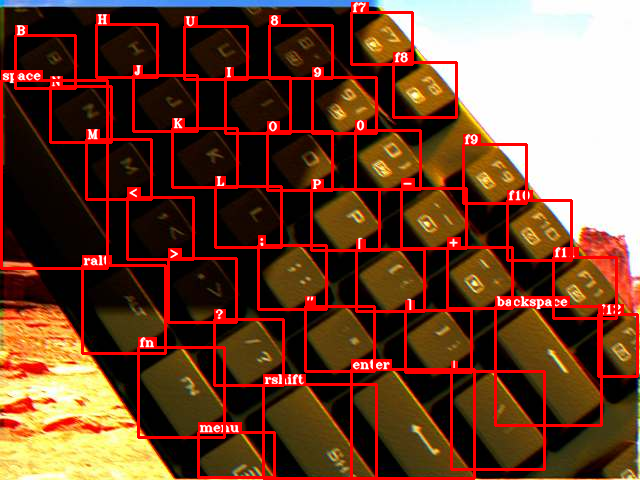

In [162]:
paths = os.listdir(f"{YOLO_MULTI_DATASET}/train/labels")
i = random.choice(paths)

img = Image.open(f"{YOLO_MULTI_DATASET}/train/images/{i.removesuffix('.txt')}.jpg")
img = np.array(img)

with open(f"{YOLO_MULTI_DATASET}/train/labels/{i}") as file:
    lines = file.readlines()

for line in lines:
    key, cx, cy, w, h = map(float, line.split())
    cx *= img.shape[1]
    cy *= img.shape[0]
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    x1 = int(cx - w / 2)
    y1 = int(cy - h / 2)
    
    key = int(key) + 1
    text = id_to_key.get(key, str(key))
    draw_textbox(img, (x1, y1), (x1 + w, y1 + h), text, (255, 0, 0), scale=1, thickness=0.25, size=0.4)

Image.fromarray(img)

In [164]:
model = YOLO("yolo11n.pt")

In [165]:
results = model.train(data=f"{YOLO_MULTI_DATASET}/data.yaml", time=12, patience=10, batch=32, single_cls=False,
                      cache=True, verbose=True, device="mps", plots=True, project="models/yolo-multiclass")

New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=datasets/yolo-multiclass/data.yaml, epochs=100, time=12, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=mps, workers=8, project=models/yolo-multiclass, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

train: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/labels.cache... 4496 images, 0 backgrounds, 1 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/images/1827.jpg: ignoring corrupt image/label: Label class 95 exceeds dataset class count 88. Possible class labels are 0-87
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (3.9GB RAM): 100%|██████████| 4495/4495 [00:00<00:00, 5119.43it/s]
val: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/valid/labels.cache... 503 images, 0 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.4GB RAM): 100%|██████████| 503/503 [00:00<00:00, 5535.07it/s]

Plotting labels to models/yolo-multiclass/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00011, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to models/yolo-multiclass/train
Starting training for 12 hours...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      71.4G      1.719      5.454      1.251       1440        640: 100%|██████████| 141/141 [18:34<00:00,  7.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [01:15<08:48, 75.49s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [01:58<05:39, 56.60s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [02:31<03:48, 45.60s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [03:10<02:51, 42.86s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [03:43<01:58, 39.42s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [04:13<01:12, 36.30s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [04:43<00:34, 34.37s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [05:24<00:00, 40.62s/it]


                   all        503      27459      0.025    0.00274     0.0134     0.0111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      59.1G      1.336      4.523     0.9646       1101        640: 100%|██████████| 141/141 [25:05<00:00, 10.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:21<02:33, 21.93s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:43<02:09, 21.60s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:01<01:40, 20.02s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:24<01:25, 21.27s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:42<01:00, 20.16s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:59<00:38, 19.03s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [02:19<00:19, 19.25s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [02:40<00:00, 20.11s/it]


                   all        503      27459     0.0237    0.00439     0.0131    0.00951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/28      68.3G      1.302      3.593     0.9597       1234        640: 100%|██████████| 141/141 [28:53<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:21<02:31, 21.61s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:40<01:59, 19.91s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:55<01:29, 17.94s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:09<01:05, 16.31s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:23<00:45, 15.25s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:36<00:29, 14.62s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:49<00:13, 13.93s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [02:04<00:00, 15.57s/it]


                   all        503      27459     0.0446    0.00787     0.0245     0.0177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/26      67.9G      1.215      2.996     0.9494       1344        640: 100%|██████████| 141/141 [38:32<00:00, 16.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:29<03:23, 29.10s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:54<02:40, 26.80s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:16<02:04, 24.87s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:37<01:32, 23.19s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:57<01:06, 22.23s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:17<00:42, 21.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [02:37<00:20, 20.74s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [02:54<00:00, 21.79s/it]


                   all        503      27459     0.0782      0.012     0.0425     0.0305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/24      64.5G      1.148      2.705     0.9402       1298        640: 100%|██████████| 141/141 [37:44<00:00, 16.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:23<02:46, 23.80s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:51<02:36, 26.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:08<01:50, 22.09s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:32<01:31, 22.81s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:53<01:06, 22.02s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:21<00:48, 24.11s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [02:39<00:22, 22.16s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:00<00:00, 22.60s/it]


                   all        503      27459      0.118    0.00897      0.062     0.0435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/22      69.6G      1.083      2.481     0.9268       1351        640: 100%|██████████| 141/141 [41:24<00:00, 17.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:26<03:03, 26.20s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:40<01:53, 18.91s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:04<01:47, 21.53s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:19<01:15, 18.84s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:31<00:49, 16.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [01:51<00:35, 17.68s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [02:13<00:18, 18.95s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [02:34<00:00, 19.34s/it]


                   all        503      27459      0.143     0.0125     0.0756     0.0499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/21      66.3G      1.035      2.331     0.9176       1301        640: 100%|██████████| 141/141 [42:56<00:00, 18.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:25<02:55, 25.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:48<02:23, 24.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:09<01:52, 22.55s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:34<01:35, 23.79s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [01:53<01:06, 22.09s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:16<00:44, 22.10s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [02:33<00:20, 20.49s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [02:56<00:00, 22.11s/it]


                   all        503      27459      0.153     0.0145     0.0823      0.061

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      59.6G     0.9952        2.2     0.9124       1375        640: 100%|██████████| 141/141 [47:30<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:21<02:27, 21.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:48<02:28, 24.68s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:15<02:09, 25.97s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:42<01:45, 26.40s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [02:09<01:19, 26.63s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:24<00:45, 22.55s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [02:48<00:23, 23.13s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:28<00:00, 26.10s/it]


                   all        503      27459      0.174     0.0131     0.0926     0.0647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/19      66.9G     0.9614        2.1     0.9043       1424        640: 100%|██████████| 141/141 [58:37<00:00, 24.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:37<04:22, 37.50s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [01:16<03:48, 38.15s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:53<03:09, 37.98s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [02:29<02:27, 36.94s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [03:05<01:49, 36.66s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [03:42<01:13, 36.89s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [04:18<00:36, 36.39s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [04:55<00:00, 36.95s/it]

                   all        503      27459      0.179     0.0138     0.0952     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/18        64G      0.926      2.021     0.8995       1102        640: 100%|██████████| 141/141 [59:19<00:00, 25.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:36<04:18, 36.86s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [01:08<03:24, 34.04s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:40<02:43, 32.76s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [02:10<02:06, 31.71s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [02:37<01:30, 30.16s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [03:03<00:57, 28.71s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [03:29<00:27, 27.81s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:47<00:00, 28.44s/it]

                   all        503      27459       0.18     0.0138     0.0963     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/17      67.6G     0.9006      1.952     0.8951       1302        640: 100%|██████████| 141/141 [1:02:50<00:00, 26.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:24<02:52, 24.65s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:43<02:08, 21.39s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:17<02:14, 26.89s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:51<01:58, 29.75s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [02:25<01:33, 31.33s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:59<01:04, 32.33s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [03:35<00:33, 33.32s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:57<00:00, 29.70s/it]

                   all        503      27459      0.181      0.014     0.0969     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      69.1G     0.8871      1.902     0.8931       1516        640: 100%|██████████| 141/141 [58:44<00:00, 25.00s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:36<04:18, 36.90s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [01:10<03:29, 34.92s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:47<03:00, 36.09s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [02:20<02:18, 34.52s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [02:55<01:45, 35.04s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [03:28<01:08, 34.10s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [04:03<00:34, 34.51s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [04:40<00:00, 35.05s/it]

                   all        503      27459      0.185     0.0141     0.0995     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      71.9G     0.8689      1.868     0.8913       1504        640: 100%|██████████| 141/141 [1:05:44<00:00, 27.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:39<04:39, 39.90s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:57<02:39, 26.63s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:12<01:48, 21.64s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [01:38<01:32, 23.13s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [02:07<01:15, 25.16s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [02:35<00:52, 26.40s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [03:04<00:27, 27.16s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:39<00:00, 27.38s/it]

                   all        503      27459       0.19     0.0145      0.102     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      71.1G     0.8572      1.842     0.8877       1432        640: 100%|██████████| 141/141 [1:04:01<00:00, 27.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:42<04:57, 42.52s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [01:07<03:13, 32.29s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [01:49<03:02, 36.56s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 4/8 [02:31<02:35, 38.83s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 5/8 [02:56<01:41, 33.73s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 6/8 [03:36<01:11, 35.82s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [04:13<00:36, 36.47s/it]

WARNING ⚠️ NMS time limit 4.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [04:38<00:00, 34.79s/it]

                   all        503      27459      0.194     0.0146      0.104     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      32.5G     0.8508      1.847     0.8869       2249        640:   5%|▍         | 7/141 [03:54<1:14:49, 33.50s/it]


KeyboardInterrupt: 